In [3]:
# CREATING A NEURAL NETWORK
# We are going to use some of the most popular tools in the industry: TENSORFLOW for framework and KERAS to build the neural network:
    # 1. TensorFlow is an end-to-end open source platform for machine learning.
    # It allows us to run our code across multiple platforms in a highly efficient way.
    # 2. Keras is an abrstraction layer on top of TensorFlow that makes it easier to build models.
    # We use Keras for the same reason that we use hvPlot to create charts instead of the more verbose Matplotlib library - it makes the work easier.
# Using Keras and TensorFlow, we will apply the standard model-fit-predict pattern that we are familiar with form working with scikit-learn.

In [5]:
# IMPORTING THE KERAS LIBRARIES
# We will begin coding our neural network soon.
# But first, in order to use TensorFlow and Keras, we must import the Keras libraries as the following:
# Import the libraries and dependencies
import tensorflow.python as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# For this basic neural network, we'll use two Keras classes:
    # 1. SEQUENTIAL: We'll use the `Sequential` model to build a neural network with a linear stack of layers.
    # 2. DENSE: The `Dense` module allows us to add layers within a neural network.
# Within our `Sequential` model, we'll add three `Dense` layers that will act as our input, hidden, and output layers.
# For each `Dense` layer, we'll define the number of neurons, as well as the activation function.
# Once we have completed our `Sequential` model design, we can apply the same model-fit-predict workflow that we have previously used for other machine learning algorithms.
# We originally learned this pattern in scikit-learn, but most machine learning frameworks, including TensorFlow, follow this same pattern.

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

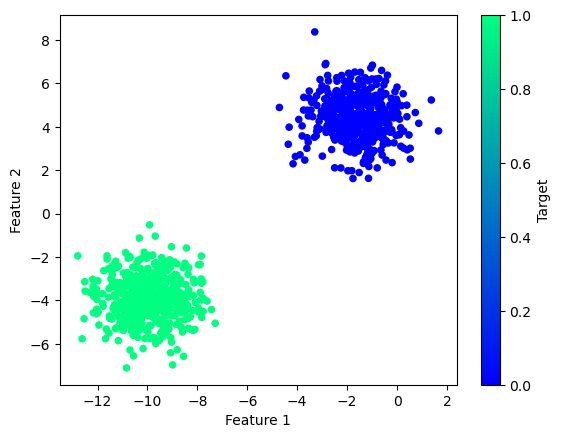

In [9]:
# LOADING AND PREPROCESSING THE DATA
# In this demonstration, we will code a neural network that can solve a binary classification - for this, we will use a dummy dataset.

# REWIND
# As we've done previously, we will use the `make_blobs` function from scikit-learn to synthetically generate a dataset.
# A dummy dataset is useful for testing a model when you don't have real data available, or when you want to simulate a particular real-world scenario.

# We will create a dummy dataset that contains 1000 samples, or data points.
# The dataset will have two features that are split into two groups, X for features and y for the target.
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2 , n_features=2, random_state=1)

# Next, we continue preprocsessing our data by transforming `y` into a vertical vector, or a single column:
y = y.reshape(-1, 1)

# To visualize the data, we'll create a DataFrame and generate a plot using the `plot` function:
# Create a DataFrame with the dummy data:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plot the dummy data:
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')                            

In [10]:
# The preceding image shows the resulting plot. 
# The dummy data falls into two distinct categories, with a cluster of blue data points on the right, and a cluster of green data points on the left.
# As we have done for other machine learning algorithms, we will now split the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# Before using a neural network, we must normalize, or standardize, the data.
# Neural networks typically perform better with all input features on the same scale.
# This makes it easier for the neural network to adjust the weights in the network.
# Developers commonly use scikit-learn's `MinMaxScaler` or `StandardScaler` functions to scale and normalize input features.
# For this example, we'll use `StandardScaler` to scale the features data.
# We do not need to scale the target data, because it is already encoded as 0 and 1.
from sklearn.preprocessing import StandardScaler
# Create the scaler instance:
X_scaler = StandardScaler()

# Fit the scaler:
X_scaler.fit(X_train)

# Scale the data:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# CREATING A NEURAL NETWORK MODEL USING KERAS
# To create a neural network, we first define an instance of the model.
# In this case, we will create an instance of the `Sequential` model and set it equal to the `neuron` variable.
neuron = Sequential()

In [15]:
# BREAKDOWN
# In this demonstration, we will create a neural network model with an input layer that consists of two inputs - one for each feature on our DataFrame.
# We will also add one hidden layer with three neurons.
# The hidden layer will perform data transformations on the inputs that we enter into the network.
# When we begin coding the model's architecture, our initial step will create both an input layer containing two inputs and a hidden layer containing three neurons.
# To add these initial layers to our neural network, we use the `add` function and the `Dense` module:
inputs = 2
hidden_nodes = 3

neuron.add(Dense(units=hidden_nodes, activation='relu', input_dim=inputs))

In [16]:
# BREAKDOWN
# Let's look more closely at the code we just wrote.
# Since our initial code creates both the input layer and the first hidden layer, we define the number of inputs with the `input_dim` parameter.
# We also define the number of neurons in the first hidden layer (Python calls these 'hidden nodes' or 'hidden neurons') with the `units` parameter.
# We use the `activation` parameter to define the activation function that will process the values of the input features before they are passed to the first hidden layer.
# In this example, we've chosen to use the RECTIFIED LINEAR UNIT (ReLU) function. (https://keras.io/activations/#relu)
# It is currently the world's most used activation function when it comes to training deep neural networks.
# Now to finish the neural network, we just need to add the output layer.
# Once again, we'll use the `Dense` module to create a new layer in our `Sequential` model.:
number_classes = 1 
neuron.add(Dense(units=number_classes, activation='sigmoid'))

In [17]:
# This time, we only need to suply two parameters: `units` and `activation`.
    # 1. `units`: In the `units` parameter, we define the number of output neurons.
    # Because we are building a classification model, the model will output a yes or no (1 or 0) binary decision for each input data point.
    # So, we only need one output neuron.
    # 2. `activation`: In the previous layer, we used a ReLU activation function to enable nonlinear relationships.
    # Now, for our classification model's output layer, we use the sigmoid activation function.
    # The sigmoid function will transform the output to a range between 0 and 1.
    # This allows the model to map the result to a probability that the input data point belongs to Class 1 (rather than Class 0).
    # Alternatively, it would allow the model to perform a hard classification and identify each input data point as either Class 1 or Class 0.
    # For this type of classification, the model would use a default threshold of 0.5.
    # In other words, the model would classify any data point with an output greater than or equal to 0.5 as Class 1, and any data point with an output less than 0.5 as Class 0.
# With these few lines of code, we created a neural network model.
# Now we can double check our model structure using the `summary` function.

# Display model summary:
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# BREAKDOWN
# The summary displays the structure - the output shape and number of weights - of each layer in our `neuron` model.
# The summary's first row includes both the input layer and the hidden layer.
# The input layer has 2 inputs, and the hidden layer has 3 neurons.
# So, in total, there are 9 *((2*3) +3) parameters.
# The summary's second row details the output layer.
# It has 3 inputs and 1 output, for a total of 4 *((3*1)+1) parameters.
# In total, the model has 13 (9+4) parameters.

In [ ]:
# CONNECT THE DOTS
# In previous sections, we learned about binary classification problems such as credit default risk, loan approvals, and fraud detection.
# We used the value 0 to represent no, and 1 to represent yes.
# Neural networks offer another approach to produce the same output.
# But, in many cases, neural networks offer better predictions than other types of machine learning algorithms.
# Neural networks' power lies in their ability to deal with both linear and nonlinear relationships among data.
# Now, you have a new skill in your FinTech toolbox to deal with binary classification problems.